# Sea Level Predictor

You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:

   1. Use Pandas to import the data from `epa-sea-level.csv`. Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axis.
   
   2. Use the `linregress` function from `scipy.stats` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.
   
   3. Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.
   
   4. The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

### 1. Use Pandas to import the data from `epa-sea-level.csv`. 

##### *Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axis.*

In [2]:
sealevel = pd.read_csv('epa-sea-level.csv')

In [3]:
sealevel.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


Text(0.5, 1.0, 'Rise in Sea Level')

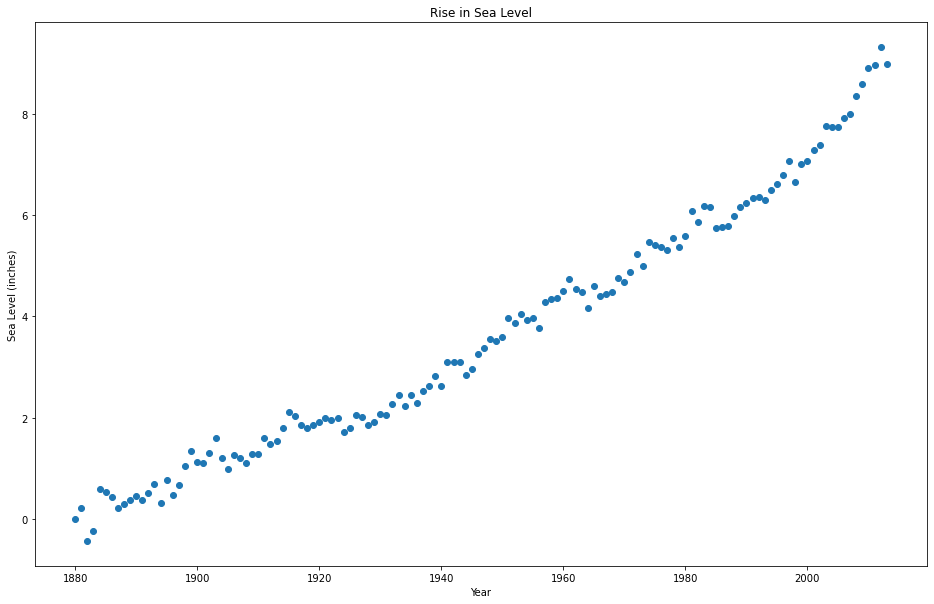

In [4]:
fig, ax = plt.subplots(figsize=(16,10))

x = sealevel['Year']
y = sealevel['CSIRO Adjusted Sea Level']

plt.scatter(x,y)
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')

### 2. Use the `linregress` function from `scipy.stats` to get the slope and y-intercept of the line of best fit. 

##### *Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.*

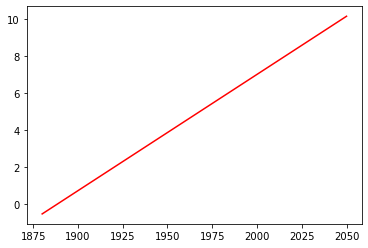

In [5]:
bestfit = linregress(sealevel["Year"], sealevel["CSIRO Adjusted Sea Level"])

# increase years to 2050 for future prediction
first_year = sealevel['Year'].min()

# panda series showing years between 1880 to 2050 (not including 2051)
x_pred = pd.Series([i for i in range(first_year, 2051)])

# y = mx + b
y_pred = (bestfit.slope * x_pred) + bestfit.intercept


plt.plot(x_pred, y_pred, 'r')

In [6]:
x_pred

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
166    2046
167    2047
168    2048
169    2049
170    2050
Length: 171, dtype: int64

In [7]:
y_pred

0      -0.542124
1      -0.479079
2      -0.416035
3      -0.352990
4      -0.289946
         ...    
166     9.923277
167     9.986322
168    10.049366
169    10.112411
170    10.175455
Length: 171, dtype: float64

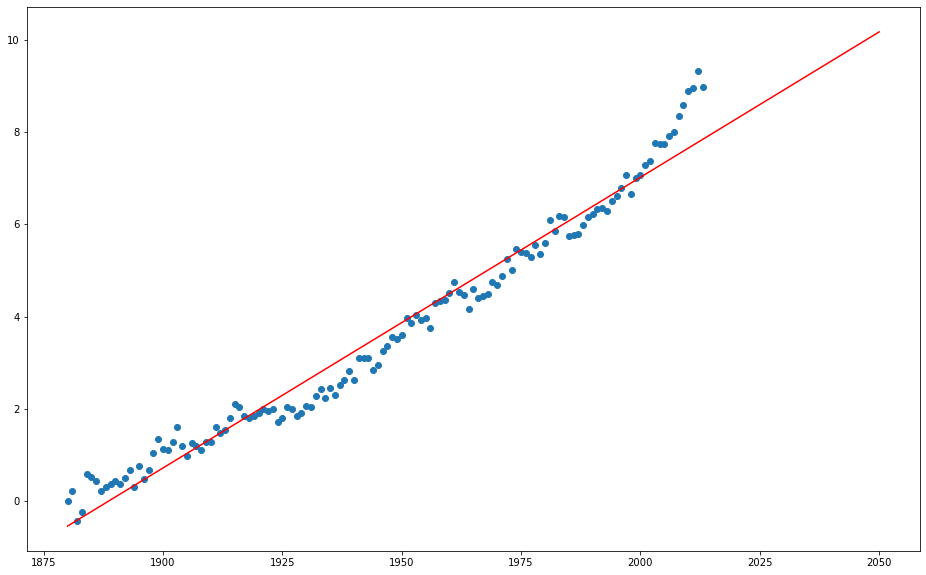

In [8]:
# Putting it together
fig, ax = plt.subplots(figsize=(16,10))

x = sealevel['Year']
y = sealevel['CSIRO Adjusted Sea Level']

plt.scatter(x,y)

bestfit = linregress(sealevel["Year"], sealevel["CSIRO Adjusted Sea Level"])

# increase years to 2050 for future prediction
first_year = sealevel['Year'].min()

# panda series showing years between 1880 to 2050 (not including 2051)
x_pred = pd.Series([i for i in range(first_year, 2051)])

# y = mx + b
y_pred = (bestfit.slope * x_pred) + bestfit.intercept


plt.plot(x_pred, y_pred, 'r')

### 3. Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. 

##### *Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.*

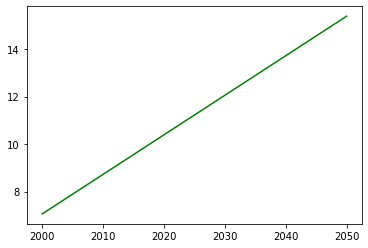

In [9]:
# Create second line of best fit
sealevel_2000 = sealevel[sealevel['Year'] >= 2000]

x2000 = sealevel_2000['Year']
y2000 = sealevel_2000['CSIRO Adjusted Sea Level']

bestfit_2000 = linregress(x2000, y2000)
first_year2000 = sealevel_2000['Year'].min()

# panda series showing years between 1880 to 2050 (not including 2051)
x_pred2000 = pd.Series([i for i in range(first_year2000, 2051)])

# y = mx + b
y_pred2000 = (bestfit_2000.slope * x_pred2000) + bestfit_2000.intercept


plt.plot(x_pred2000, y_pred2000, 'g')

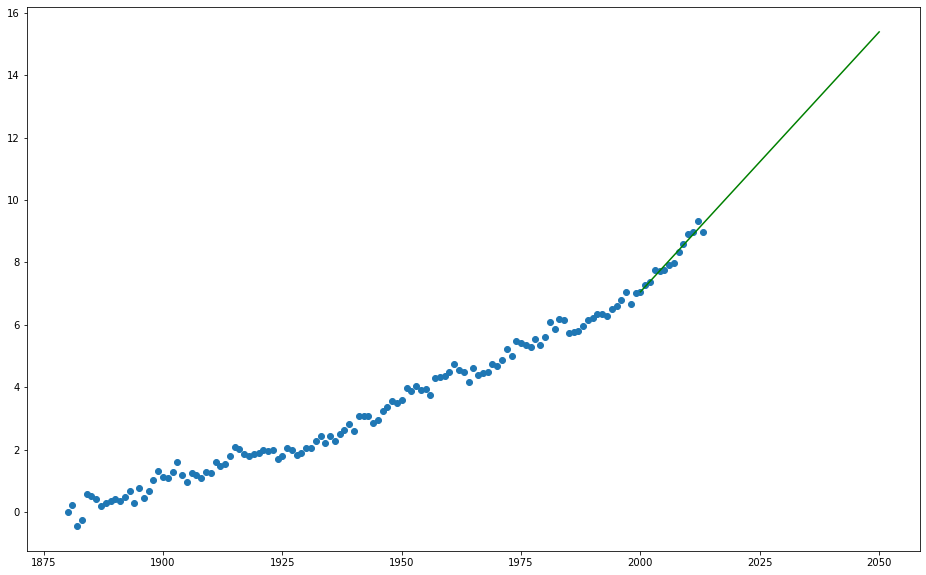

In [10]:
# Putting it together
fig, ax = plt.subplots(figsize=(16,10))

x = sealevel['Year']
y = sealevel['CSIRO Adjusted Sea Level']

plt.scatter(x,y)

bestfit = linregress(sealevel["Year"], sealevel["CSIRO Adjusted Sea Level"])

# Create second line of best fit
sealevel_2000 = sealevel[sealevel['Year'] >= 2000]

x2000 = sealevel_2000['Year']
y2000 = sealevel_2000['CSIRO Adjusted Sea Level']

bestfit_2000 = linregress(x2000, y2000)
first_year2000 = sealevel_2000['Year'].min()

# panda series showing years between 1880 to 2050 (not including 2051)
x_pred2000 = pd.Series([i for i in range(first_year2000, 2051)])

# y = mx + b
y_pred2000 = (bestfit_2000.slope * x_pred2000) + bestfit_2000.intercept


plt.plot(x_pred2000, y_pred2000, 'g')

### 4. The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".

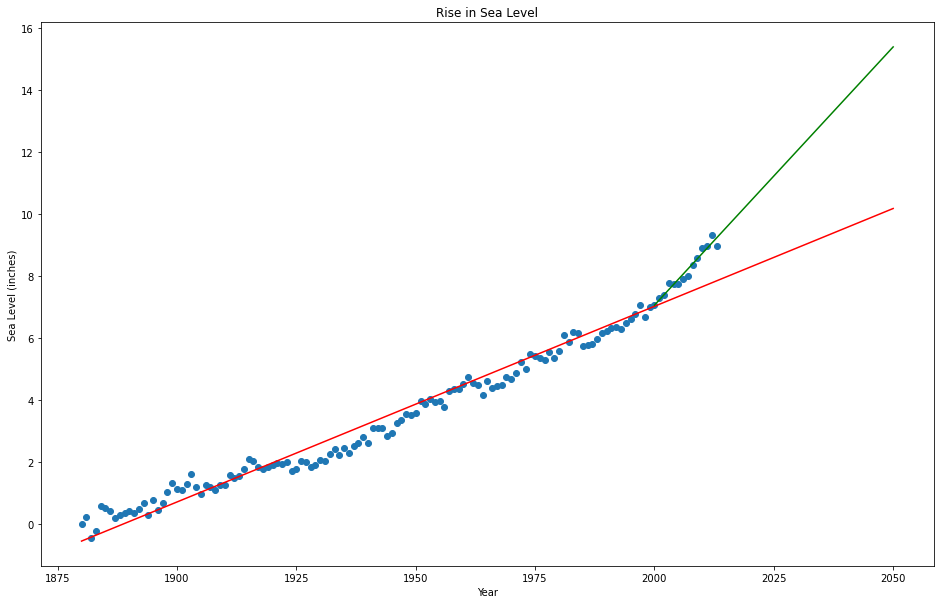

In [11]:
# Putting it together
fig, ax = plt.subplots(figsize=(16,10))

x = sealevel['Year']
y = sealevel['CSIRO Adjusted Sea Level']

ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')

plt.scatter(x,y)



## FIRST LINE OF BEST FIT (RED)
bestfit = linregress(sealevel["Year"], sealevel["CSIRO Adjusted Sea Level"])

# increase years to 2050 for future prediction
first_year = sealevel['Year'].min()

# panda series showing years between 1880 to 2050 (not including 2051)
x_pred = pd.Series([i for i in range(first_year, 2051)])

# y = mx + b
y_pred = (bestfit.slope * x_pred) + bestfit.intercept


plt.plot(x_pred, y_pred, 'r')


# SECOND LINE OF BEST FIT (GREEN)
# 2nd line of best fit (>= year 2000)
sealevel_2000 = sealevel[sealevel['Year'] >= 2000]

x2000 = sealevel_2000['Year']
y2000 = sealevel_2000['CSIRO Adjusted Sea Level']

bestfit_2000 = linregress(x2000, y2000)
first_year2000 = sealevel_2000['Year'].min()

# panda series showing years between 1880 to 2050 (not including 2051)
x_pred2000 = pd.Series([i for i in range(first_year2000, 2051)])

# y = mx + b
y_pred2000 = (bestfit_2000.slope * x_pred2000) + bestfit_2000.intercept


plt.plot(x_pred2000, y_pred2000, 'g')



plt.savefig('sea_level_plot.png')